# PyTorch learnings

# Tensors

* Tensors are the core data structure in Pytorch and many other deep learning frameworks
* They are like arrays(n dimensional), except they can be used on hardware accelerators like Gpus
* Tensors are generalization of numbers(0 dim tensor), vectors(1 dim tensor), matrices(2 dim tensor) in multi dimension
* Tensors are vital in almost all domains of ML and DL. Neural network takes tensors as input and produce tensors as output. Even the parameters of a neural network, the weights and biases, are saved as tensors

In [1]:
import torch

In [7]:
data = [[1,2,3], [4,5,6]]
tensor_example = torch.tensor(data)
print(tensor_example)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [9]:
tensor_example.shape

torch.Size([2, 3])

In [11]:
tensor_example.dtype

torch.int64

# Tensor Operations

* Tensor operations include arithmetical operations
* We can also perform operations between a scalar and a tensor, or  between tensors of different shapes, using a technique called Broadcasting

In [15]:
tensor1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.int32)
tensor2 = torch.tensor([[5, 6], [7, 8]], dtype=torch.int32)

In [19]:
sum = torch.add(tensor1, tensor2)
sum

tensor([[ 6,  8],
        [10, 12]], dtype=torch.int32)

In [21]:
tensor1 + tensor2

tensor([[ 6,  8],
        [10, 12]], dtype=torch.int32)

In [23]:
prod = tensor2 * tensor1
prod

tensor([[ 5, 12],
        [21, 32]], dtype=torch.int32)

In [25]:
prod = torch.mul(tensor1, tensor2)
prod

tensor([[ 5, 12],
        [21, 32]], dtype=torch.int32)

In [27]:
matmul = torch.matmul(tensor1, tensor2)

In [29]:
matmul

tensor([[19, 22],
        [43, 50]], dtype=torch.int32)

In [43]:
tensor3= torch.tensor([[1], [2]], dtype=torch.int32)
torch.matmul(tensor1, tensor3)

tensor([[ 5],
        [11]], dtype=torch.int32)

# Tensor Broadcasting

* Broadcasting is a technique that allows PyTorch to perform operations on tensors of different shapes.
* It essentially extends the smaller tensor to match the shape of the larger tensor so that operations can be performed element-wise

```python
tensor1 = torch.tensor(
    [[1, 2],
     [3, 4]], dtype=torch.int32)
```

```python
tensor3 = torch.tensor(
    [[1],
     [2]], dtype=torch.int32)
```

In [51]:
tensor1 + 10

tensor([[11, 12],
        [13, 14]], dtype=torch.int32)

In [53]:
tensor1 + tensor3

tensor([[2, 3],
        [5, 6]], dtype=torch.int32)

In [55]:
tensor1 * tensor3

tensor([[1, 2],
        [6, 8]], dtype=torch.int32)

# Reshaping tensors

* Reshaping means changing the tensors dimensions without altering the underlying data
* Reshaping is necessary to match the input/output shapes of the data with the layers shapes of neural network

`view()` method allows you to return a new tensor with the same data but a different shape.

In [7]:
tensor_a = torch.tensor([[1,2,3], [4,5,6]])
tensor_a.shape

torch.Size([2, 3])

In [11]:
new_ten = tensor_a.view(3,2)
new_ten

tensor([[1, 2],
        [3, 4],
        [5, 6]])

* to flatten a tensor, use -1 in argument so it will convert the n dim tensor into 1 dim 

In [14]:
flat = tensor_a.view(-1)
flat

tensor([1, 2, 3, 4, 5, 6])

# Creating a dataset

* Pytorh's primary unit of data storage is a tensor.
* A `TensorDataset` is a dataset that wraps multiple tensors
* Each sample is a tuple of tensors where each tensor in the tuple corresponds to a level of the dataset.
* It is not always necessary to use `TensorDataset`, it can be very convenient especially if you want to use a `DataLoader` for batching and shuffling your data

In [9]:
import numpy as np
X = np.array([[1.0, 2.0], [2.0, 1.0], [3.0, 4.0], [4.0, 3.0]])
y = np.array([0, 1, 0, 1])

In [11]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.int32)

In [13]:
from torch.utils.data import TensorDataset

dataset = TensorDataset(X_tensor, y_tensor)

In [15]:
for i in range(len(dataset)):
    X_sample, y_sample = dataset[i]
    print(f"X[{i}]: {X_sample}, y[{i}]: {y_sample}")

X[0]: tensor([1., 2.]), y[0]: 0
X[1]: tensor([2., 1.]), y[1]: 1
X[2]: tensor([3., 4.]), y[2]: 0
X[3]: tensor([4., 3.]), y[3]: 1


# Implementing DataLoader

* DataLoader takes in a dataset and other parameters like `batch_size`, which defines the number of samples to work with per batch, and `shuffle`, which indicates to shuffle the data every epoch if set to True

In [19]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [25]:
for batch_X, batch_y in dataloader:
    print(f"Batch X:\n{batch_X}")
    print(f"Batch y:\n{batch_y}\n")

Batch X:
tensor([[1., 2.],
        [4., 3.]])
Batch y:
tensor([0, 1], dtype=torch.int32)

Batch X:
tensor([[2., 1.],
        [3., 4.]])
Batch y:
tensor([1, 0], dtype=torch.int32)



# Layers of neural network

* A layer in neural network refers to a collection of neurons (nodes) operating together at the same depth level
* A linear layer performs a linear transformation on its input data
  * Formula: `y = Wx + b`
    * `y` is output vector
    * `W` is weight matrix (Scales the vector)
    * `x` is input vector
    * `b` is bias vector (shifts the vector)

In [13]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[1.0, 2.0]], dtype=torch.float32)
layer = nn.Linear(in_features=2, out_features=4) # input neurons, 4 output neurons
output_tensor = layer(input_tensor)

print("Input tensor:", input_tensor)
print("Output tensor:", output_tensor)

Input tensor: tensor([[1., 2.]])
Output tensor: tensor([[ 0.6681, -0.7588, -0.4721, -0.9576]], grad_fn=<AddmmBackward0>)


* An activation function introduce non-linearity into the model, enabling to handle complex patterns
* Two commonly used activation functions are: ReLU (rectified linear unit), sigmoid
  * ReLU: $$ f(x) = max(0, x) $$
  * sigmoid: $$ f(x) = \frac{1}{1+ e^{-x}} $$

In [23]:
relu = nn.ReLU()
activated_op_relu = relu(output_tensor)
print(activated_op_relu)

tensor([[0.6681, 0.0000, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)


In [25]:
sigmoid = nn.Sigmoid()
activated_op_sig = sigmoid(output_tensor)
print(activated_op_sig)

tensor([[0.6611, 0.3189, 0.3841, 0.2774]], grad_fn=<SigmoidBackward0>)


# Neural network

* PyTorch's modules are encapsulated as Python classes and serve as building blocks for designing models.
* Any model we create in PyTorch is a subclass of the `nn.Module`

In [3]:
import torch
import torch.nn as nn

In [5]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(in_features=10, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

* Input size of each layer must always match the output size of the preceding layer
* In `forward()` method, we define how the input tensor `x` moves through the various layers and activation functions of the network

In [11]:
model = SimpleNN()
print(model)

SimpleNN(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


# Sequential models

* A Sequential model, as the name suggests, allows us to build a model as a plain stack of layers - with each layer having one input tensor and one output tensor
* Created using `nn.Sequential()` function.
* It makes the building of models more comfortable, and the created models are shorter and more readable

In [5]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [7]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Sigmoid()
)


# Training a neural network

* Training a neural network is a process of learning the weight parameters that minimize the error on the training data
* The process involves passing data through the model (forward propagation), computing the loss (predicted value - expected value), and then adjusting the weights using this loss (Back propagation)

* At the core of supervised learning techniques, we need input data (features) and output data (target/labels)
*  In our scenario, the input represents: \[avg goals scored, avg goals conceded\]. The output is binary, won (1) or lost (0).

In [2]:
import torch

# Input features [Average Goals Scored, Average Goals Conceded by Opponent]
X = torch.tensor([
    [3.0, 0.5], [1.0, 1.0], [0.5, 2.0], [2.0, 1.5],
    [3.5, 3.0], [2.0, 2.5], [1.5, 1.0], [0.5, 0.5],
    [2.5, 0.8], [2.1, 2.0], [1.2, 0.5], [0.7, 1.5]
], dtype=torch.float32)

# Target outputs [1 if the team won, 0 otherwise]
y = torch.tensor([[1], [0], [0], [1], [1], [0], [1], [0], [1], [0], [1], [0]], dtype=torch.float32)

In [5]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [6]:
import torch.optim as optim

# loss function: Binary cross entropy
criterion = nn.BCELoss()

# optimizer: Adam
optimizer = optim.Adam(model.parameters(), lr=0.1)

* Training in neural networks typically involves interatively passing data through our model, calculating the loss, and backpropagating the loss to update our model.
* This is repeated for certain number of epochs.
* An epoch is one complete pass through the entire training dataset

In [8]:
# train for 50 epochs
for epoch in range(50):
    # set the model in training mode
    model.train()
    # zero the gradients for this iteration; gradients accumulate by default in PyTorch
    optimizer.zero_grad()
    # foward pass: compute the results
    outputs = model(X)
    # compute the loss
    loss = criterion(outputs, y)
    # backward pass: compute the gradients of the loss
    loss.backward()
    # optimize the model parameters based on the gradients
    optimizer.step()
    # display progress every 10 epochs
    if (epoch + 1)%10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

Epoch 10, Loss: 0.2934242784976959
Epoch 20, Loss: 0.06583815068006516
Epoch 30, Loss: 0.014907230623066425
Epoch 40, Loss: 0.005229164380580187
Epoch 50, Loss: 0.0028132807929068804


# Making predictions

* The first crucial step after we have trained the model, is to switch it to eval mode
* In training mode, `Dropout` is enabled (fraction of nodes are dropped), but now this time, it is disabled
* In training mode, `Batch Normalization` uses the batch statistics (mean and variance) to perform normalization, but in eval mode, it uses the running statistics (accumlated during the training), rather than the statistics of the current batch

In [14]:
new_input = torch.tensor([[4.0, 5.0]], dtype=torch.float32)

# switch to eval mode
model.eval()

# disable gradient calculation 
with torch.no_grad():
    prediction = model(new_input)

In [16]:
prediction

tensor([[2.0065e-11]])

In [18]:
int((prediction > 0.5).item())

0

In [12]:
X_test = torch.tensor([[2.5, 1.0], [0.8, 0.8], [1.0, 2.0], [3.0, 2.5]], dtype=torch.float32)
y_test = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)

In [18]:
from sklearn.metrics import accuracy_score, precision_score

In [20]:
model.eval()
with torch.no_grad():

    outputs = model(X_test)

    predicted_classes = (outputs > 0.5).int()

    test_loss = criterion(outputs, y_test).item()

    test_accuracy = accuracy_score(y_test.numpy(), predicted_classes.numpy())

    test_precision = precision_score(y_test.numpy(), predicted_classes.numpy())

print(f'\nTest accuracy: {test_accuracy}\nTest loss: {test_loss}\nTest precision: {test_precision}')


Test accuracy: 1.0
Test loss: 0.0014120392734184861
Test precision: 1.0


# Preprocessing datasets

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

print("Features:", wine.feature_names)
print("Target classes:", wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']


In [3]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (124, 13)
Shape of X_test: (54, 13)
Shape of y_train: (124,)
Shape of y_test: (54,)


In [4]:
from sklearn.preprocessing import StandardScaler

# This step fits the scaler to your training data, meaning it calculates the mean and standard deviation from X_train.
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Unscaled X sample:\n", X_train[0])
print("Scaled X sample:\n", X_train_scaled[0])

Unscaled X sample:
 [1.184e+01 2.890e+00 2.230e+00 1.800e+01 1.120e+02 1.720e+00 1.320e+00
 4.300e-01 9.500e-01 2.650e+00 9.600e-01 2.520e+00 5.000e+02]
Scaled X sample:
 [-1.48636784  0.52773635 -0.45157285 -0.43509941  0.7679684  -0.95710762
 -0.73671749  0.56401159 -1.09324412 -1.00759327  0.02200127 -0.13370673
 -0.77521339]


In [5]:
import torch

In [6]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print("Sample of X_train_tensor:", X_train_tensor[0])
print("Sample of y_train_tensor:", y_train_tensor[0])

Sample of X_train_tensor: tensor([-1.4864,  0.5277, -0.4516, -0.4351,  0.7680, -0.9571, -0.7367,  0.5640,
        -1.0932, -1.0076,  0.0220, -0.1337, -0.7752])
Sample of y_train_tensor: tensor(1)


# Building a multi-class classification model

In [7]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)


In [8]:
criterion = nn.CrossEntropyLoss()

* Cross entropy loss is used when the output needs to be a probability distribution. This means it helps measure how different the predicted probabilities are from the actual labels.
* We don't need to explicitly define a softmax layer as the loss function handles it for us
* `CrossEntropyLoss` expects raw scores (a.k.a logits) as inputs and internally applies softmax to convert these into probabilities

In [9]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

* Adam, short for Adaptive moment estimation, is an algorithm that adjusts the models parameters based on the gradients
* Learning rate controls how big a step we take while updating the parameters

In [11]:
X_train = X_train_tensor
X_test = X_test_tensor
y_train = y_train_tensor
y_test = y_test_tensor

In [12]:
num_epochs = 150
history = {"loss": [], "val_loss": []}

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    history["loss"].append(loss.item())

    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)
        val_loss = criterion(outputs_val, y_test)
        history["val_loss"].append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

Epoch [10/150], Train Loss: 1.0772, Val Loss: 1.0967
Epoch [20/150], Train Loss: 1.0484, Val Loss: 1.0698
Epoch [30/150], Train Loss: 1.0192, Val Loss: 1.0435
Epoch [40/150], Train Loss: 0.9879, Val Loss: 1.0131
Epoch [50/150], Train Loss: 0.9523, Val Loss: 0.9760
Epoch [60/150], Train Loss: 0.9111, Val Loss: 0.9322
Epoch [70/150], Train Loss: 0.8636, Val Loss: 0.8802
Epoch [80/150], Train Loss: 0.8091, Val Loss: 0.8200
Epoch [90/150], Train Loss: 0.7455, Val Loss: 0.7508
Epoch [100/150], Train Loss: 0.6733, Val Loss: 0.6731
Epoch [110/150], Train Loss: 0.5959, Val Loss: 0.5882
Epoch [120/150], Train Loss: 0.5177, Val Loss: 0.5042
Epoch [130/150], Train Loss: 0.4431, Val Loss: 0.4270
Epoch [140/150], Train Loss: 0.3755, Val Loss: 0.3595
Epoch [150/150], Train Loss: 0.3168, Val Loss: 0.3034


# Deep evaluation of models

In [14]:
from sklearn.metrics import accuracy_score

model.eval()

with torch.no_grad():
    outputs = model(X_test)
    test_loss = criterion(outputs, y_test).item()
    # choose the class with the highest probability as the predicted value
    _, predicted = torch.max(outputs, 1)
    test_accuracy = accuracy_score(y_test, predicted)

print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

Test Accuracy: 1.0000, Test Loss: 0.3034


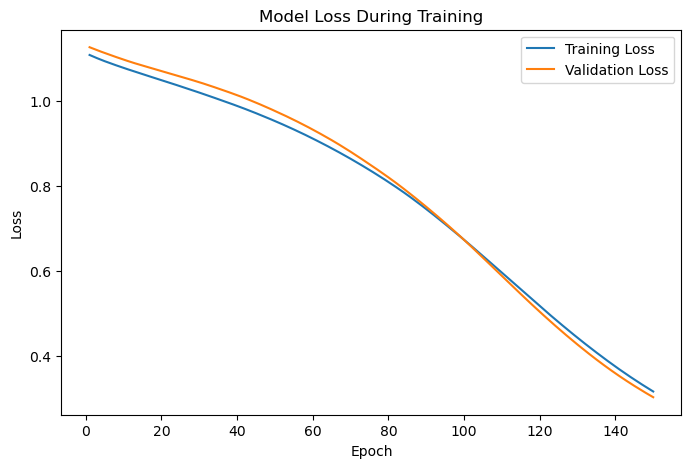

In [16]:
import matplotlib.pyplot as plt


epochs = range(1, num_epochs + 1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Saving and loading Pytorch models

In [28]:
torch.save(model, "wine_model.pth")

In [30]:
loaded_model = torch.load("wine_model.pth", weights_only=False)
loaded_model.eval() # it is essential to set the model to eval after loading it

C:\Users\HP\AppData\Local\Temp\ipykernel_5940\85787333.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load("wine_model.pth")


Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)

In [32]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    model.eval()
    original_outputs = model(X_test)
    loaded_outputs = loaded_model(X_test)

    _, original_predicted = torch.max(original_outputs, 1)
    _, loaded_predicted = torch.max(loaded_outputs, 1)

    original_accuracy = accuracy_score(y_test, original_predicted)
    loaded_accuracy = accuracy_score(y_test, loaded_predicted)


print(f'Original Model Accuracy: {original_accuracy:.4f}')
print(f'Loaded Model Accuracy: {loaded_accuracy:.4f}')

Original Model Accuracy: 1.0000
Loaded Model Accuracy: 1.0000


# Model checkpointing

* Model checkpointing involves saving the state of a neural network model at various points during the training process
* This prevents loss of progress in case of  power failure, hardware malfunction etc.. checkpointing helps in resuming training from the last saved state
* By saving the model whenever it achieves a new best performance on a validation set, we ensure that we reatain the best version of our model

In [36]:
best_loss = float('inf') # we keep it to infinite
checkpoint_path = "best_model.pth"

In [40]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test).item()

    # implement checkpointing
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model, checkpoint_path)
        print(f"Model saved at epoch {epoch} with validation loss {val_loss:.4f}!")

Model saved at epoch 0 with validation loss 0.2934!
Model saved at epoch 1 with validation loss 0.2886!
Model saved at epoch 2 with validation loss 0.2839!
Model saved at epoch 3 with validation loss 0.2793!
Model saved at epoch 4 with validation loss 0.2748!
Model saved at epoch 5 with validation loss 0.2704!
Model saved at epoch 6 with validation loss 0.2660!
Model saved at epoch 7 with validation loss 0.2618!
Model saved at epoch 8 with validation loss 0.2576!
Model saved at epoch 9 with validation loss 0.2535!
Model saved at epoch 10 with validation loss 0.2495!
Model saved at epoch 11 with validation loss 0.2456!
Model saved at epoch 12 with validation loss 0.2418!
Model saved at epoch 13 with validation loss 0.2381!
Model saved at epoch 14 with validation loss 0.2345!
Model saved at epoch 15 with validation loss 0.2309!
Model saved at epoch 16 with validation loss 0.2275!
Model saved at epoch 17 with validation loss 0.2241!
Model saved at epoch 18 with validation loss 0.2207!
Mod

# Training with mini batches

In Machine learning, there are three main methods for training models:
- Stochastic gradient descent
- Full batch gradient descent
- Mini batch gradient descent

SGD:
* The model weights are updated after processing each individual training example
* For each training example, it computes the gradient of the loss function with respect to the model parameters, and then updates the parameters accordingly

Full batch GD:
* The model weights are updates after processing the entire dataset
* It computes the gradient of the loss function w.r.t the model parameters based on the avg of all examples in the dataset

Mini batch GD:
* Compromise between the above two methods
* Updates its weights after processing a small batch

In [9]:
import torch
from sklearn.datasets import load_wine

wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

In [11]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [13]:
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [15]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in data_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        print(f"Batch Loss: {loss.item():.4f}")
        running_loss += loss.item() * batch_X.size(0)

    epoch_loss = running_loss / len(data_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}] Average Loss: {epoch_loss:.4f}')

Batch Loss: 28.6072
Batch Loss: 25.4370
Batch Loss: 30.1804
Batch Loss: 42.0932
Batch Loss: 34.0817
Batch Loss: 35.6205
Epoch [1/10] Average Loss: 32.4379
Batch Loss: 34.3715
Batch Loss: 28.4559
Batch Loss: 29.0758
Batch Loss: 23.7466
Batch Loss: 26.2374
Batch Loss: 23.8116
Epoch [2/10] Average Loss: 27.9157
Batch Loss: 25.4319
Batch Loss: 26.2260
Batch Loss: 23.6337
Batch Loss: 25.9583
Batch Loss: 18.3860
Batch Loss: 21.8599
Epoch [3/10] Average Loss: 23.7181
Batch Loss: 24.0283
Batch Loss: 22.5402
Batch Loss: 19.8977
Batch Loss: 19.5751
Batch Loss: 16.8055
Batch Loss: 15.6078
Epoch [4/10] Average Loss: 20.0676
Batch Loss: 19.1345
Batch Loss: 19.4436
Batch Loss: 16.6199
Batch Loss: 13.8787
Batch Loss: 15.1902
Batch Loss: 15.4866
Epoch [5/10] Average Loss: 16.7152
Batch Loss: 17.5944
Batch Loss: 11.6425
Batch Loss: 12.6552
Batch Loss: 11.2055
Batch Loss: 14.6627
Batch Loss: 14.8385
Epoch [6/10] Average Loss: 13.6822
Batch Loss: 12.1746
Batch Loss: 10.6029
Batch Loss: 11.7761
Batch Loss

# Learning rate scheduling

* It involves changing the learning rate during the training process to enhance the performance and statbilit of the model
* A consistent learning rate may cause the model to get stuck in local minima or diverge if it starts too large.
* Adjusting the learning rate can help the model converge faster and more effectively to a solution

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [7]:
import torch.optim.lr_scheduler as lr_scheduler

scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=10)

In [9]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid)

    scheduler.step(val_loss)  # Update learning rate

    if (epoch + 1) % 10 == 0:
        lr = optimizer.param_groups[0]["lr"]
        print(f'Epoch [{epoch + 1}/{num_epochs}], LR: {lr:.6f}')

Epoch [10/100], LR: 0.100000
Epoch [20/100], LR: 0.010000
Epoch [30/100], LR: 0.001000
Epoch [40/100], LR: 0.001000
Epoch [50/100], LR: 0.000100
Epoch [60/100], LR: 0.000010
Epoch [70/100], LR: 0.000001
Epoch [80/100], LR: 0.000000
Epoch [90/100], LR: 0.000000
Epoch [100/100], LR: 0.000000


# Dealing with overfitting

* Overfitting occurs when the model learns not only the underlying patterns in the training data but also the random noise, leading to poor performance on new, unseen data
* Regularization techniques add additional constraints or penalities to the model's learning process, encouraging it to focus on the most important patterns in the data and improving its generalization ability.

In [2]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(10, 3)
)

* Dropout randomly sets a fraction of activations in the previous layer to zero, preventing the neural network becoming too dependent on any particular node

In [9]:
from sklearn.datasets import load_wine
import torch

wine = load_wine()
X = wine.data
y = wine.target

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for i in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()

    if(i==50):
        # Introducing weight decay from 50th epoch on
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
        print("\nRegularization added to optimizer\n")

    if (i+1) % 10 ==0:
        # L2 norm of weights of the first linear layer
        first_layer_weights = model[0].weight.norm(2).item()
        print(f'{i+1} - L2 norm of weights: {first_layer_weights}')

    optimizer.step()  # Update weights

10 - L2 norm of weights: 1.829788088798523
20 - L2 norm of weights: 1.828264594078064
30 - L2 norm of weights: 1.8285893201828003
40 - L2 norm of weights: 1.8299075365066528
50 - L2 norm of weights: 1.8316445350646973

Regularization added to optimizer

60 - L2 norm of weights: 1.7831552028656006
70 - L2 norm of weights: 1.7314496040344238
80 - L2 norm of weights: 1.6850314140319824
90 - L2 norm of weights: 1.6392663717269897
100 - L2 norm of weights: 1.594768762588501


* L2 regularization penalizes large weights by adding their squared values to the loss function. This also prevents the neural network to rely too heavily on any particular feature

NOTE:

*  Initially the optimizer is set up without any L2 regularization
*  At epoch 50, the optimizer is updated to include L2 regularization by adding a `weight_decay` of 0.1. This introduces a penalty to the weights, helping prevent overfitting
